In [1]:
from scipy.stats import ttest_ind
import datetime
import pandas as pd
import numpy as np
import pyfolio as pf
from backtester import Backtest
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from strategies.dataset import Dataset

/home/serg/CRYPTO/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [3]:
'''
1. Install ta
https://github.com/bukosabino/ta
'''
data_binance = Dataset()
data = data_binance.get_data(days=90, ticker='BTCUSDT', ts='1H')

# Describe Volume data

In [4]:
'''
The mean volume for 5 minute is 269.95 BTC
Standart devation is 235.57 BTC
The range for 75% of all observations between 143.74 BTC and 310.38 BTC
'''
data.volume.describe()

count     2154.000000
mean      2994.366208
std       1795.192916
min          0.000000
25%       1904.530651
50%       2546.762931
75%       3506.445955
max      24477.792792
Name: volume, dtype: float64

In [5]:
'''
The histogram is shifted to the right. This means that there are a lot of abnormal volumes.
'''
fig = go.Figure()
fig.add_trace(go.Histogram(x=data.volume, name='Volume'))
fig.show()


In [6]:
'''
https://en.wikipedia.org/wiki/Quantile#:~:text=In%20statistics%20and%20probability%2C%20quantiles,the%20number%20of%20groups%20created.
'''
data['minutes'] = data.index.minute
data['hours'] = data.index.hour
data['days'] = data.index.day_of_week
data['quantile_volume'] =pd.qcut(data['volume'], 5, labels=['very_low', 'low', 'normal', 'high', 'very_high'])
data['quantile_volume'].value_counts()

very_low     431
low          431
high         431
very_high    431
normal       430
Name: quantile_volume, dtype: int64

## Analyse volume per minutes

In [8]:
'''
The biggest volume at 5 minutes
The lowest volume at 45 minutes
'''
data.groupby('hours', as_index=False).agg({'volume': 'mean'})

,hours,volume
0,0,2290.448335
1,1,3397.297507
2,2,2804.337695
3,3,2780.218664
4,4,2554.529278
5,5,2800.141006
6,6,2545.303333
7,7,2796.204686
8,8,2910.706102
9,9,3326.446013


In [13]:
fig = go.Figure()
fig.add_trace(go.Bar(x=data.groupby('hours', as_index=False).agg({'volume': 'median'})['volume'], name='Volume'))
fig.show()

In [16]:
hours_volume = pd.crosstab(data['hours'], data['quantile_volume'])
print(hours_volume)

quantile_volume  very_low  low  normal  high  very_high
hours                                                  
0                      27   28      13    19          3
1                       5   15      17    28         26
2                      21   15      23    18         13
3                      30   21      11    11         16
4                      30   19      19    11         10
5                      21   24      17    13         13
6                      25   26      19     9         10
7                      22   20      17    11         19
8                      17   19      18    20         15
9                      10   17      20    19         24
10                     10   23      20    11         26
11                      9   18      23    19         21
12                     13   19      19    22         17
13                      5   11      16    31         27
14                      5    9      17    30         29
15                      8   11      24    14    

<AxesSubplot:ylabel='Frequency'>

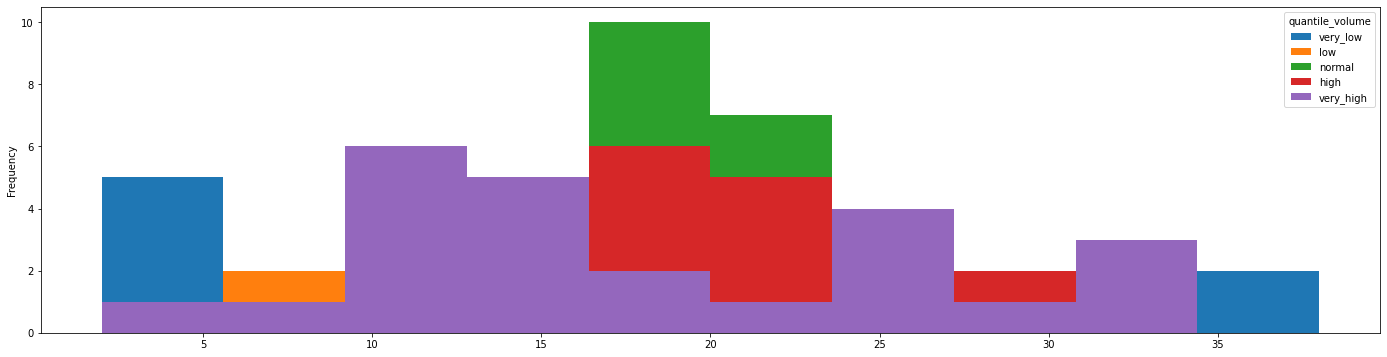

In [24]:
hours_volume.plot.hist(figsize=(24, 6))

## Analyse volume per hours

<AxesSubplot:xlabel='hours'>

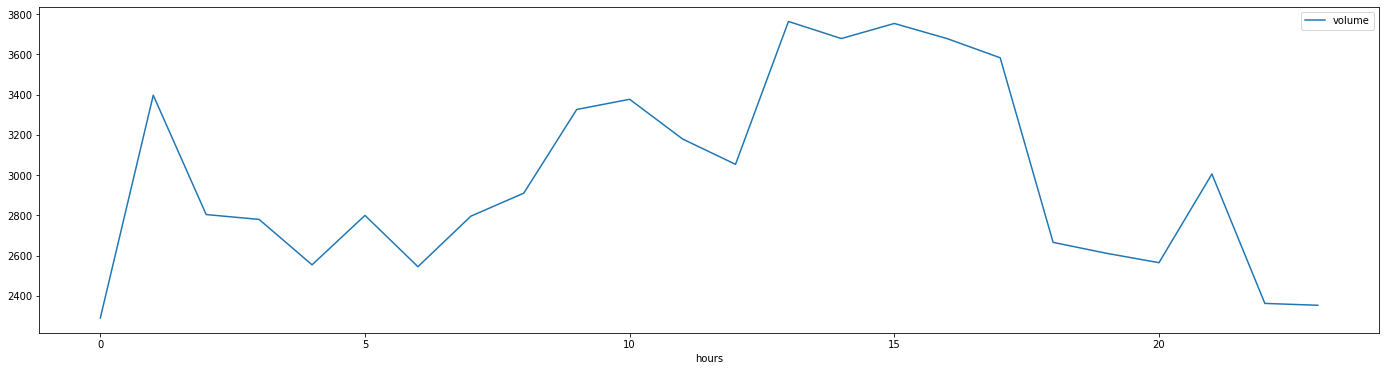

In [32]:
'''
The biggest volume in 12 hour
The lowest volume at 22 hour
'''
data.groupby('hours', as_index=True).agg({'volume': 'mean'}).plot(figsize=(24, 6))


In [33]:
fig = go.Figure()
fig.add_trace(go.Bar(x=data.groupby('days', as_index=False).agg({'volume': 'mean'})['volume'], name='Volume'))
fig.show()

In [14]:
pd.crosstab(data['hours'], data['quantile_volume'])

quantile_volume,very_low,low,normal,high,very_high
hours,,,,,
0,122,182,230,246,301
1,219,240,236,186,199
2,279,243,173,190,173
3,333,230,188,176,132
4,267,242,196,181,165
5,294,248,225,165,135
6,245,212,232,194,185
7,203,244,216,218,187
8,141,213,221,241,254


## Analyse volume per days

In [15]:
data.groupby('days', as_index=False).agg({'volume': 'mean'})


,days,volume
0,0,285.803013
1,1,283.265525
2,2,269.422001
3,3,247.469252
4,4,266.438124
5,5,205.619992
6,6,215.999847


In [16]:
fig = go.Figure()
fig.add_trace(go.Bar(x=data.groupby('days', as_index=False).agg({'volume': 'mean'})['volume'], name='Volume'))
fig.show()

In [17]:
pd.crosstab(data['days'], data['quantile_volume'])

quantile_volume,very_low,low,normal,high,very_high
days,,,,,
0,559,724,777,822,862
1,564,670,784,795,901
2,482,721,766,897,878
3,618,802,821,807,681
4,634,698,769,763,880
5,1092,798,624,503,423
6,1212,747,619,573,536


### Statistical Test

In [18]:
'''
What is  T - test?
https://www.investopedia.com/terms/t/t-test.asp
With this test, we determine that the values are not random. If the values are greater than 5%, then we can reject the hypothesis that the values are random.

'''
group = data.groupby('minutes')['volume'].apply(lambda x:list(x))
for index, value in group.iteritems():
    statistical_test =ttest_ind(data['volume'], value, equal_var=False)
    if statistical_test[1] > 0.05:
        print(index ,statistical_test)

10 Ttest_indResult(statistic=-1.8613758204272828, pvalue=0.06280551045394295)
15 Ttest_indResult(statistic=-0.14496372672226382, pvalue=0.8847512931082926)
20 Ttest_indResult(statistic=-1.6966613414651495, pvalue=0.08988714056461092)
25 Ttest_indResult(statistic=0.516662468477691, pvalue=0.6054377908034851)
35 Ttest_indResult(statistic=-1.1634114409747738, pvalue=0.24477193278564605)
50 Ttest_indResult(statistic=0.7095167579709407, pvalue=0.47806941617469556)


## Backtest

### Simple backtest

<AxesSubplot:xlabel='time'>

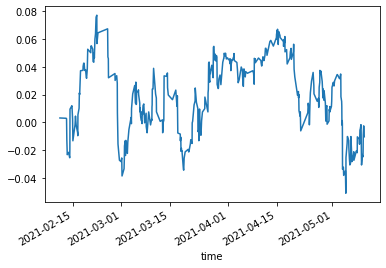

In [37]:
LAG = 1
data.loc[:, 'y'] = data['close'].shift(-LAG).pct_change()
data = data.dropna()
# data.loc[:, 'signal'] = np.where((data['quantile_volume'] == 'very_low') | (data['quantile_volume'] == 'low'), 1, 0)
data.loc[:, 'signal'] = np.where(data['quantile_volume'] == 'low', 1, 0)
# data.loc[:, 'signal'] = np.where(data['quantile_volume'] == 'very_low', -1, data['signal'])
data[data['signal'] == 1]['y'].cumsum().plot()

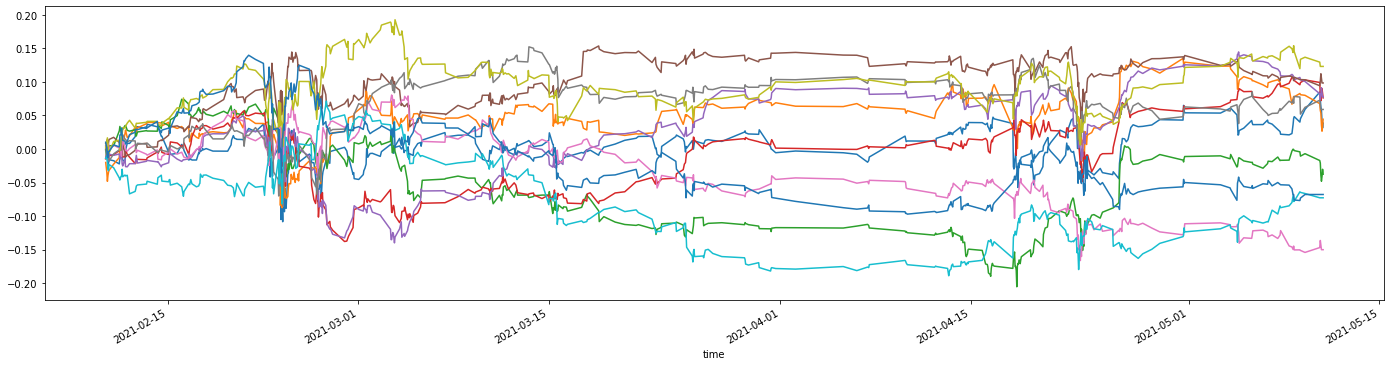

In [45]:
lags = np.arange(1, 12)
for i in lags:
    data.loc[:, f'y_{i}'] = data['close'].shift(-i).pct_change()
    data.loc[:, f'signal_{i}'] = np.where(data['quantile_volume'] == 'very_high', 1, 0)
    data[data[f'signal_{i}'] == 1][f'y_{i}'].cumsum().plot(figsize=(24, 6))



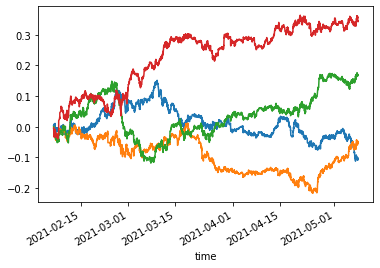

In [20]:
lags = np.arange(1, 5)
for i in lags:
    data.loc[:, 'y'] = data['close'].shift(-i).pct_change()
    data = data.dropna()
    # data.loc[:, 'signal'] = np.where((data['quantile_volume'] == 'very_low') | (data['quantile_volume'] == 'low'), 1, 0)
    data.loc[:, 'signal'] = np.where(data['quantile_volume'] == 'normal', 1, 0)
    data[data['signal'] == 1]['y'].cumsum().plot() # Find input lebels


## Revise statistical effect

In [21]:
'''
If pvalue more than 0.05 (5%). It means statistics is working. We could input this statisitcal in our strategy
'''
ttest_ind(
    data[data['signal'] == 1]['y'],
    data['y'], equal_var=False
    )

Ttest_indResult(statistic=1.2237846708597355, pvalue=0.22106965706238074)

In [22]:
'''
1. Make hypotesis  (your ideas)
1.1. Describe statistical
2. Check statistical using t-test (find p-Value). If it (more than 5%) working go in next step
3. Create simple backtest
3.1 Find the best lag
4. Use comples backtest (take profit, stop loss, kind of backtest: "exit by signal", "exit by lag", "exit by take profit or stopp loss")

'''

'\n1. Make hypotesis  (your ideas)\n1.1. Describe statistical\n2. Check statistical using t-test (find p-Value). If it (more than 5%) working go in next step\n3. Create simple backtest\n3.1 Find the best lag\n4. Use comples backtest (take profit, stop loss, kind of backtest: "exit by signal", "exit by lag", "exit by take profit or stopp loss")\n\n'

<AxesSubplot:xlabel='time'>

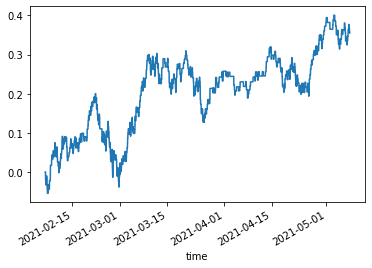

In [23]:
'''
Exit by signal
'''
back = Backtest()
returns = back.exit_by_signal(data=data, take_profit=0.01, stop_loss=-0.01, comission=0)
returns['cumsum'].plot()

<AxesSubplot:xlabel='time'>

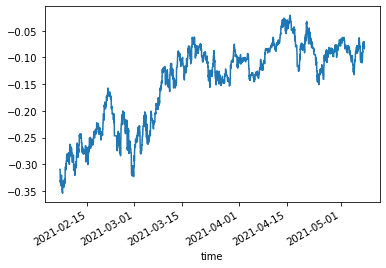

In [24]:
'''
Exit by lag
'''
returns = back.exit_by_lag(data=data, take_profit=0.01, stop_loss=-0.01, lag=5, comission=0)
returns['cumsum'].plot()

<AxesSubplot:xlabel='time'>

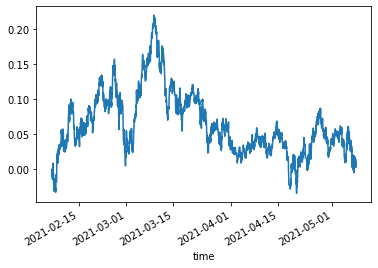

In [25]:
'''
Exit by take profit and stop loss
'''
returns = back.exit_by_take(data=data, take_profit=0.003, stop_loss=-0.003, comission=0)
returns['cumsum'].plot()

### Add new variabels to improve result

In [26]:
#### Add support line and resistance line
ROLLING_WINDOW = 12
SIGMA = 2
data['std'] = data['close'].pct_change().rolling(ROLLING_WINDOW).std()
sigma = data['std'].mean() * SIGMA
data.loc[:, 'support_line'] = np.where(data['std'] < SIGMA, 1, 0)
data.loc[:, 'resistance_line'] = np.where(data['std'] > SIGMA, 1, 0)
print(sigma)


0.0048641699903052785


In [27]:
data_hm = data.copy()
data_hm['signal'] = np.where((data['signal'] == 1) & (data['support_line'] == 1), 1, 0)

<AxesSubplot:xlabel='time'>

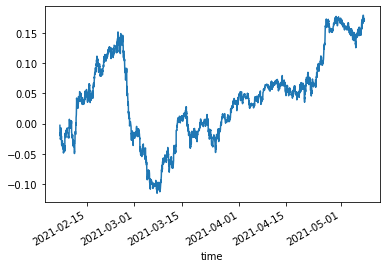

In [28]:
LAG = 3
data_hm.loc[:, 'y'] = data_hm['close'].shift(-LAG).pct_change()
data_hm = data_hm.dropna()
data_hm.loc[:, 'signal'] = np.where(data_hm['quantile_volume'] == 'normal', 1, 0)
data_hm[data_hm['signal'] == 1]['y'].cumsum().plot()